#  Passing network

## Example
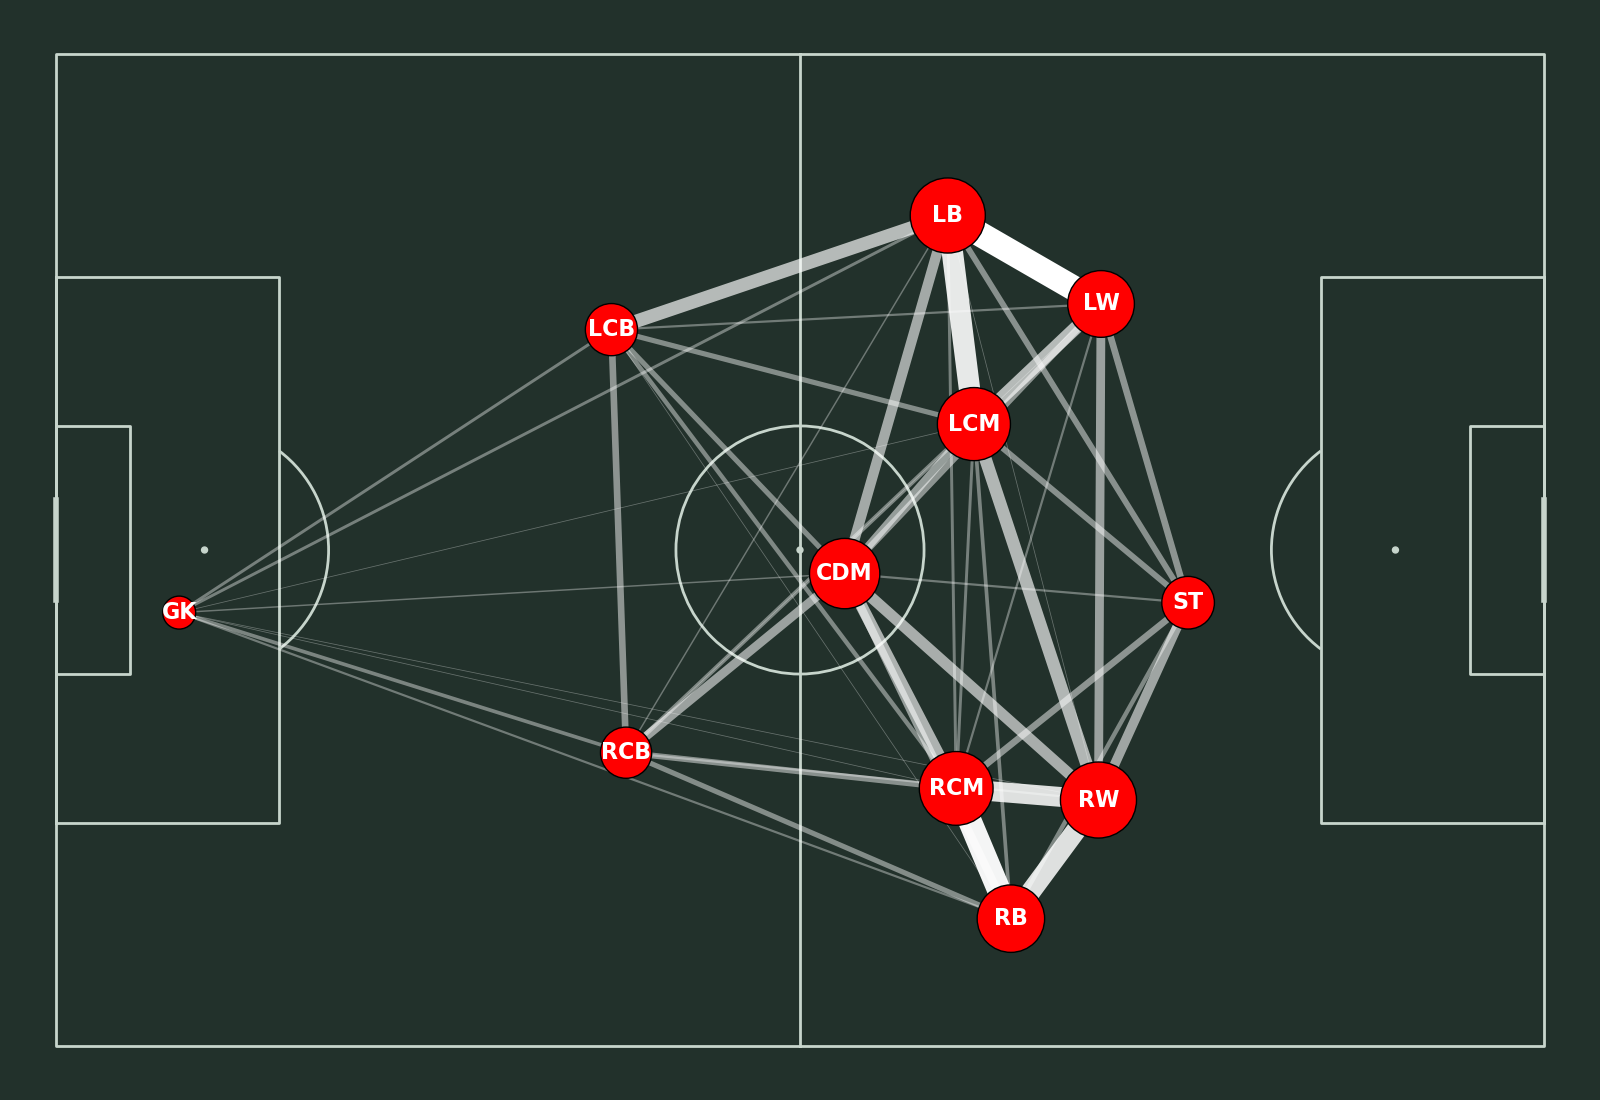

__Statsbomb Open Data Events Structure and Data Specification:__
https://github.com/statsbomb/statsbombpy/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

from mplsoccer import Pitch, FontManager

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from statsbombpy import sb

## First, choose a competition

In [2]:
comp = sb.competitions()

credentials were not supplied. open data access only


In [3]:
comp.competition_name.unique().tolist()

['Champions League',
 "FA Women's Super League",
 'FIFA World Cup',
 'La Liga',
 'NWSL',
 'Premier League',
 'UEFA Euro',
 "Women's World Cup"]

___Decided to check available UEFA Champions League matches___

In [4]:
ucl = comp[comp['competition_name'] == 'Champions League']

In [5]:
ucl

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2021-06-22T21:17:46.381,2021-06-13T16:17:31.694,None,2021-06-22T21:17:46.381
9,16,21,Europe,Champions League,male,False,False,2009/2010,2021-06-22T21:24:20.506,2021-06-13T16:17:31.694,None,2021-06-22T21:24:20.506


# Focusing on UCL final 2009: Man Utd v FC Barcelona

## Get the data

In [6]:
matches = sb.matches(competition_id=16,season_id=41)

credentials were not supplied. open data access only


In [7]:
matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,3750201,2009-05-27,20:45:00.000,Europe - Champions League,2008/2009,Barcelona,Manchester United,2,0,available,scheduled,2021-11-07T14:20:01.699993,2021-06-13T16:17:31.694,1,Final,Stadio Olimpico (Roma),Massimo Busacca,1.1.0,2,2


In [8]:
events = sb.events(3750201)

credentials were not supplied. open data access only


In [9]:
events.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_offensive', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_no_touch', 'dribble_outcome', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_end_location', 'pass_goal_assist', 'pass_height',
       'pass_inswinging', 'pass_length', 'pass_miscommunic

To create a passing network from Statsbomb data:

- ID of the pass
- minute of the pass
- the team
- the players
- coordinates (x,y,endX,endY)
- the outcome

In [10]:
utd_barca = events[['id','team','player','position','pass_recipient','minute',
                    'type', 'location', 'pass_end_location', 'pass_outcome',
                   ]]

In [11]:
utd_barca.dtypes

id                   object
team                 object
player               object
position             object
pass_recipient       object
minute                int64
type                 object
location             object
pass_end_location    object
pass_outcome         object
dtype: object

In [12]:
#scholes = utd_barca[utd_barca['player'] == 'Paul Scholes'] 

### Preprocessing

I need to create the coordinates x, y, endX and endY in order to have the passes.

In [13]:
#N.B could already scale the data here by multiplying by 1.2 and .8 for x and y respectively
def get_passes(df):
    df['x'] = [i[0] for i in df['location'].values]
    df['y'] = [i[1] for i in df['location'].values]
    df['endX'] = [i[0] for i in df['pass_end_location'].values]
    df['endY'] = [i[1] for i in df['pass_end_location'].values]

In [14]:
passes = utd_barca[utd_barca['type'] == 'Pass']

In [15]:
get_passes(passes)

In [16]:
passes = passes.drop(['location', 'pass_end_location'], axis =1)

In [17]:
barca_passes = passes[passes['team'] == 'Barcelona']

print(f"Barcelona have attempted a number of {len(barca_passes)}")

utd_passes = passes[passes['team'] == 'Manchester United']

print(f"Man Utd have attempted a number of {len(utd_passes)}")

Barcelona have attempted a number of 518
Man Utd have attempted a number of 485


In [18]:
passes[['pass_outcome']] = passes[['pass_outcome']].fillna('Successful')

In [19]:
suc = passes[passes['pass_outcome'] == 'Successful']

In [20]:
subs = utd_barca[utd_barca['type'] == 'Substitution']

In [21]:
barca_ = suc[suc['team'] == 'Barcelona']
bsubs = subs[subs['team'] == 'Barcelona']
utd = suc[suc['team'] == 'Manchester United']
usubs = subs[subs['team'] == 'Manchester United']

In [22]:
print(f"Barcelona have made {len(barca_)} successful passes")
print(f"Man United have made {len(utd)} successful passes")

Barcelona have made 434 successful passes
Man United have made 389 successful passes


In [23]:
print(f"Barcelona have failed {len(barca_passes) - len(barca_)} passes")
print(f"Man United have failed {len(utd_passes) - len(utd)} passes")

Barcelona have failed 84 passes
Man United have failed 96 passes


In [24]:
usubs

,id,team,player,position,pass_recipient,minute,type,location,pass_end_location,pass_outcome
3322,d223b1e0-f2fd-4d6e-b86f-5af791950cc2,Manchester United,Anderson Luis de Abreu Oliveira,Left Center Midfield,NaN,45,Substitution,NaN,NaN,NaN
3323,8ce455e3-60a8-4fcf-9bdd-895aba681df5,Manchester United,Ji-Sung Park,Left Midfield,NaN,65,Substitution,NaN,NaN,NaN
3325,fb3902db-8cfb-4a97-87d9-4b7eb173c888,Manchester United,Ryan Giggs,Left Defensive Midfield,NaN,74,Substitution,NaN,NaN,NaN


United made a half time substitution, therefore it is complicated to do man utd's passing network for this match as the passing data is disrupted at 45'.

In [25]:
bsubs

,id,team,player,position,pass_recipient,minute,type,location,pass_end_location,pass_outcome
3324,edde46c1-1269-4995-bbc5-a534587895ea,Barcelona,Thierry Henry,Left Wing,NaN,71,Substitution,NaN,NaN,NaN
3326,6c8cc00d-7989-490e-ba61-92f2a45267ec,Barcelona,Andrés Iniesta Luján,Right Center Midfield,NaN,92,Substitution,NaN,NaN,NaN


Barcelona made their first sub at the 71st minute.

In [26]:
bsubs['minute'].min()

71

#### Limit the passes until 1st substitution

In [27]:
first_barca_sub = bsubs['minute'].min()
network = barca_[barca_['minute'].values <= first_barca_sub]

In [28]:
network

,id,team,player,position,pass_recipient,minute,type,pass_outcome,x,y,endX,endY
6,6dd66800-5339-44c3-b3dd-c6d4a4500eb1,Barcelona,Andrés Iniesta Luján,Right Center Midfield,Lionel Andrés Messi Cuccittini,0,Pass,Successful,61.0,40.1,60.2,43.4
7,519a021c-3966-4856-9659-a290c4279926,Barcelona,Lionel Andrés Messi Cuccittini,Right Wing,Sergio Busquets i Burgos,0,Pass,Successful,61.3,41.1,48.4,40.8
8,705fbd42-47f8-4bd8-9ba1-2ef95eda4ca8,Barcelona,Sergio Busquets i Burgos,Center Defensive Midfield,Gnégnéri Yaya Touré,0,Pass,Successful,47.1,40.8,33.0,47.8
9,bce0d7a3-987e-45d4-b3ee-0de597ec3bdf,Barcelona,Gnégnéri Yaya Touré,Right Back,Gerard Piqué Bernabéu,0,Pass,Successful,33.0,47.8,26.5,27.8
10,9c54c35e-f31b-4c68-a47a-e78adf3db904,Barcelona,Gerard Piqué Bernabéu,Left Center Back,Víctor Valdés Arribas,0,Pass,Successful,26.5,27.8,7.9,35.3
...,...,...,...,...,...,...,...,...,...,...,...,...
782,88aef4d9-6a76-4a6a-baed-44ca0587715c,Barcelona,"Samuel Eto""o Fils",Center Forward,Gnégnéri Yaya Touré,67,Pass,Successful,30.6,75.5,9.1,66.7
783,557f1b71-833b-4e2c-8c3a-75b71dfabaf3,Barcelona,Gnégnéri Yaya Touré,Right Center Back,Carles Puyol i Saforcada,67,Pass,Successful,9.1,66.7,10.1,74.7
785,ae85dc2f-0f7d-4fa3-bfe4-8329b17e15b0,Barcelona,Carles Puyol i Saforcada,Right Back,"Samuel Eto""o Fils",68,Pass,Successful,31.6,80.0,57.1,75.9
796,fed72915-897c-4333-a8df-ce83ee7cc96b,Barcelona,Carles Puyol i Saforcada,Right Back,"Samuel Eto""o Fils",69,Pass,Successful,86.8,52.4,106.3,64.3


In [29]:
print(f"There are {len(network)} passes from Barcelona until the first change at the 71st minute")

There are 348 passes from Barcelona until the first change at the 71st minute


# Successful passes made by Barcelona players until 71'

In [30]:
avg_locations = network.groupby('player').agg({'x':['mean'], 'y':['mean', 'count']})
avg_locations.columns = ['x', 'y', 'count']

In [31]:
avg_locations

,x,y,count
player,,,
Andrés Iniesta Luján,66.915789,28.612281,57
Carles Puyol i Saforcada,61.106667,69.736667,30
Gerard Piqué Bernabéu,39.416000,27.988000,25
Gnégnéri Yaya Touré,38.191304,60.108696,23
Lionel Andrés Messi Cuccittini,77.480000,39.337143,35
"Samuel Eto""o Fils",73.918750,57.943750,16
Sergio Busquets i Burgos,61.384848,39.636364,33
Sylvio Mendes Campos Junior,68.315000,7.647500,40
Thierry Henry,83.392308,20.453846,13


In [32]:
pass_between = network.groupby(['player', 'pass_recipient']).id.count().reset_index()


In [33]:
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

In [34]:
pass_between

,player,pass_recipient,pass_count
0,Andrés Iniesta Luján,Carles Puyol i Saforcada,1
1,Andrés Iniesta Luján,Gerard Piqué Bernabéu,2
2,Andrés Iniesta Luján,Gnégnéri Yaya Touré,1
3,Andrés Iniesta Luján,Lionel Andrés Messi Cuccittini,11
4,Andrés Iniesta Luján,"Samuel Eto""o Fils",3
...,...,...,...
77,Xavier Hernández Creus,"Samuel Eto""o Fils",4
78,Xavier Hernández Creus,Sergio Busquets i Burgos,5
79,Xavier Hernández Creus,Sylvio Mendes Campos Junior,5
80,Xavier Hernández Creus,Thierry Henry,4


In [49]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [50]:
display_side_by_side(avg_locations, pass_between)

,x,y,count
player,,,
Andrés Iniesta Luján,66.915789,28.612281,57
Carles Puyol i Saforcada,61.106667,69.736667,30
Gerard Piqué Bernabéu,39.416000,27.988000,25
Gnégnéri Yaya Touré,38.191304,60.108696,23
Lionel Andrés Messi Cuccittini,77.480000,39.337143,35
"Samuel Eto""o Fils",73.918750,57.943750,16
Sergio Busquets i Burgos,61.384848,39.636364,33
Sylvio Mendes Campos Junior,68.315000,7.647500,40
Thierry Henry,83.392308,20.453846,13


In [35]:
# pass_between = pass_between.merge(avg_locations, left_on='player', right_index = True)
# pass_between = pass_between.merge(avg_locations, left_on='pass_recipient', right_index=True)

In [36]:
pass_between = pass_between.merge(avg_locations, left_on='player', right_index = True)
pass_between = pass_between.merge(avg_locations, left_on='pass_recipient', right_index=True)

,player,pass_recipient,pass_count,x_x,y_x,count_x,x_y,y_y,count_y
0,Andrés Iniesta Luján,Carles Puyol i Saforcada,1,66.915789,28.612281,57,61.106667,69.736667,30
19,Gerard Piqué Bernabéu,Carles Puyol i Saforcada,2,39.416000,27.988000,25,61.106667,69.736667,30
28,Gnégnéri Yaya Touré,Carles Puyol i Saforcada,7,38.191304,60.108696,23,61.106667,69.736667,30
36,Lionel Andrés Messi Cuccittini,Carles Puyol i Saforcada,1,77.480000,39.337143,35,61.106667,69.736667,30
44,"Samuel Eto""o Fils",Carles Puyol i Saforcada,3,73.918750,57.943750,16,61.106667,69.736667,30
...,...,...,...,...,...,...,...,...,...
35,Lionel Andrés Messi Cuccittini,Andrés Iniesta Luján,9,77.480000,39.337143,35,66.915789,28.612281,57
49,Sergio Busquets i Burgos,Andrés Iniesta Luján,6,61.384848,39.636364,33,66.915789,28.612281,57
57,Sylvio Mendes Campos Junior,Andrés Iniesta Luján,16,68.315000,7.647500,40,66.915789,28.612281,57
63,Thierry Henry,Andrés Iniesta Luján,5,83.392308,20.453846,13,66.915789,28.612281,57


N.B x_x is x; y_x is y; x_y is endX; y_y is endY

# mplsoccer Pitch()

In [38]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

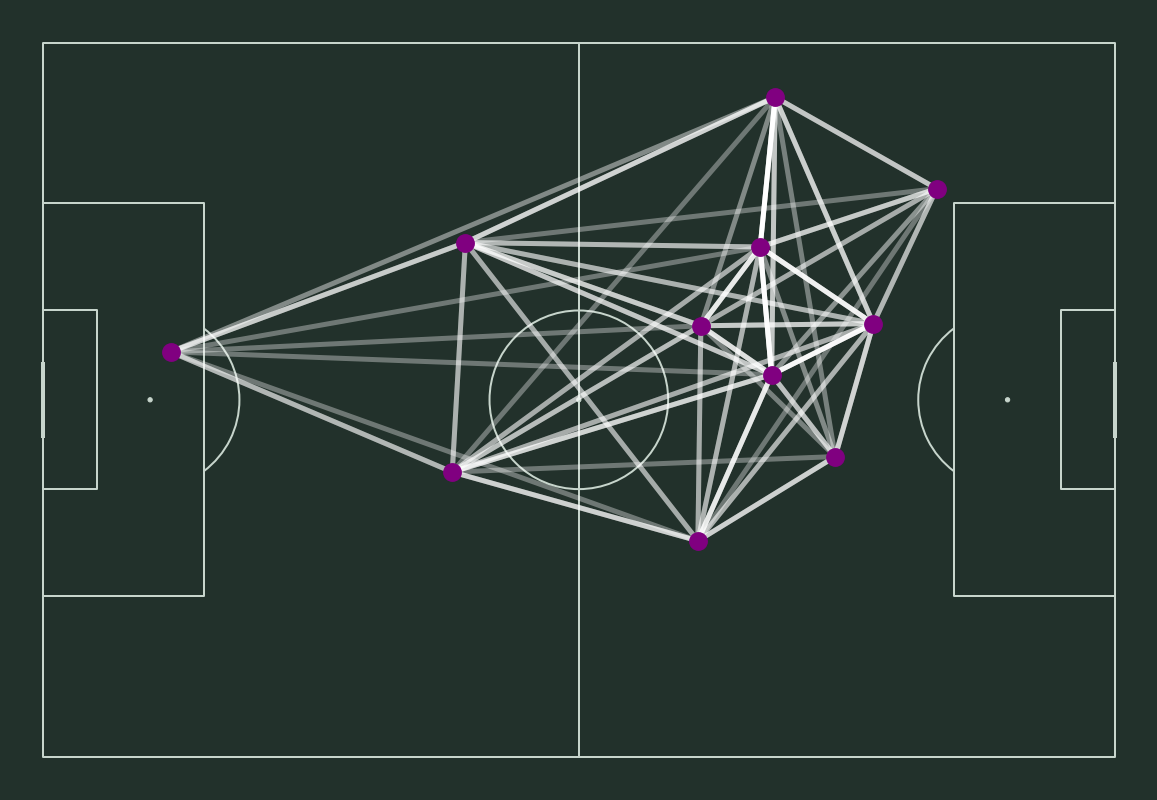

In [45]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(1.2*pass_between.x_x, .8*pass_between.y_x, #scale the data!
                         1.2*pass_between.x_y, .8*pass_between.y_y, 
                         #lw=passes_between.width,
                         color=color, zorder=1, ax=ax)

nodes = pitch.scatter(1.2*avg_locations.x, .8*avg_locations.y, s=300, #scale!
                      color='purple', linewidth = 1.5, 
                      alpha = 1, zorder=1, ax=ax)

In [40]:
o = pd.DataFrame(events['tactics'][0])

In [41]:
for i in o['lineup']:
    print(i)
    j = pd.DataFrame(i)

{'player': {'id': 20176, 'name': 'Víctor Valdés Arribas'}, 'position': {'id': 1, 'name': 'Goalkeeper'}, 'jersey_number': 1}
{'player': {'id': 3087, 'name': 'Gnégnéri Yaya Touré'}, 'position': {'id': 2, 'name': 'Right Back'}, 'jersey_number': 24}
{'player': {'id': 20125, 'name': 'Carles Puyol i Saforcada'}, 'position': {'id': 3, 'name': 'Right Center Back'}, 'jersey_number': 5}
{'player': {'id': 5213, 'name': 'Gerard Piqué Bernabéu'}, 'position': {'id': 5, 'name': 'Left Center Back'}, 'jersey_number': 3}
{'player': {'id': 25854, 'name': 'Sylvio Mendes Campos Junior'}, 'position': {'id': 6, 'name': 'Left Back'}, 'jersey_number': 16}
{'player': {'id': 5203, 'name': 'Sergio Busquets i Burgos'}, 'position': {'id': 10, 'name': 'Center Defensive Midfield'}, 'jersey_number': 28}
{'player': {'id': 5216, 'name': 'Andrés Iniesta Luján'}, 'position': {'id': 13, 'name': 'Right Center Midfield'}, 'jersey_number': 8}
{'player': {'id': 20131, 'name': 'Xavier Hernández Creus'}, 'position': {'id': 15, '

In [42]:
j

,player,position,jersey_number
id,19298,23,9
name,"Samuel Eto""o Fils",Center Forward,9
